<a href="https://colab.research.google.com/github/RafaSFernandes/DS_Projects/blob/main/Estudos_de_Modelos_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola DNC

Aluno: Rafael Souza Fernandes

Material de estudo

# Materia 09
Modelos de Classificação e Regressão


#0. Bibliotecas

In [1]:
#Dados
import pandas as pd

#Matemática
import numpy as np
from random import randint

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split #Separação de treino e teste
from sklearn.model_selection import KFold #Validação K-fold

#Métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Métricas
from sklearn.metrics import confusion_matrix #Matriz de confusão
from sklearn.metrics import classification_report #Relatório com métricas de avaliação


#1. Importando dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Datasets_Modulos/Materia_09/The Spotify.zip (Unzipped Files)/'

In [4]:
df_90 = pd.read_csv(path + 'dataset-of-90s.csv')
df_00 = pd.read_csv(path + 'dataset-of-00s.csv')
df_10 = pd.read_csv(path + 'dataset-of-10s.csv')

In [5]:
df = pd.concat([
    df_90,
    df_00,
    df_10
])

#2. Análise exploratória

In [6]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [7]:
df.shape

(17790, 19)

In [8]:
#Existência de dados nulos na coluna 'target'
df['target'].isnull().sum()

np.int64(0)

In [9]:
#Proporção de valores na coluna 'target'
df['target'].value_counts(normalize=True)

,proportion
target,
0,0.5
1,0.5


In [10]:
#Existência de duplicatas
df.duplicated().sum()

np.int64(173)

In [11]:
#Removendo duplicatas
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(17617, 19)

In [13]:
#Conferindo a proporção da coluna "target"
df['target'].value_counts(normalize=True)

,proportion
target,
0,0.50491
1,0.49509


In [14]:
#Agrupamento de valores pelas colunas "track" e "artist" buscando encontrar duplicidade nestas duas colunas juntas
df.groupby(['track', 'artist']).size().sort_values(ascending=False)

,,0
track,artist,
Falling,Julee Cruise,12
Chebika - Claudio Mate Metal Remix,Stefano Patarnello,8
Feeling Punk - Asle Remix,Todd Terry,6
Until the Day I Die,Story Of The Year,5
Spiegel im Spiegel,Arvo Pärt,5
...,...,...
Hate Rock Trio,HTRK,1
Hate Me Now,Nas Featuring Puff Daddy,1
Hate Me,Eurielle,1


In [15]:
#Removendo duplicatas nas colunas "track" e "artist"
df.drop_duplicates(subset=['track', 'artist'], inplace=True)

In [16]:
#Verificando a proporção de valores na coluna "target"
df['target'].value_counts(normalize=True)

,proportion
target,
1,0.502246
0,0.497754


In [17]:
#Verificando os tipos de dados
df.dtypes

,0
track,object
artist,object
uri,object
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64


In [18]:
#Verificando dados nulos
df.isnull().sum()

,0
track,0
artist,0
uri,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [19]:
#Estatísticas
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,1.736200e+04,17362.000000,17362.000000,17362.000000,17362.000000
mean,0.559860,0.655534,5.269036,-8.368586,0.652632,0.088807,0.240249,0.157978,0.196683,0.485989,121.053226,2.494776e+05,3.923050,40.964088,10.795473,0.502246
std,0.187469,0.246079,3.563331,5.302304,0.476148,0.092832,0.307832,0.308222,0.167195,0.255124,29.909889,1.119149e+05,0.378197,19.964160,4.744401,0.500009
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.438000,0.505000,2.000000,-9.919000,0.000000,0.035700,0.009080,0.000000,0.093800,0.278250,97.149000,1.997632e+05,4.000000,27.902563,8.000000,0.000000
50%,0.577000,0.699000,5.000000,-6.913500,1.000000,0.050400,0.082700,0.000044,0.128000,0.487000,119.876000,2.331265e+05,4.000000,36.271890,10.000000,1.000000
75%,0.697000,0.856000,8.000000,-5.036000,1.000000,0.096700,0.378750,0.058800,0.257000,0.690000,140.003000,2.763132e+05,4.000000,48.324433,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.956000,0.996000,0.998000,0.992000,0.996000,217.872000,4.170227e+06,5.000000,262.615400,169.000000,1.000000


In [20]:
#Gráfico buscando identificar padrões e correlações
#sns.pairplot(df, hue='target')

In [21]:
#Identificando correlações nos dados numéricos
corr = df.select_dtypes('number').corr()
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.079547,0.020302,0.267515,-0.056397,0.187636,-0.194841,-0.349111,-0.109281,0.535457,-0.118716,-0.115242,0.177744,-0.066383,-0.090907,0.431556
energy,0.079547,1.000000,0.021120,0.773543,-0.008728,0.131180,-0.733336,-0.249619,0.201618,0.291144,0.206553,-0.088570,0.172705,-0.006720,-0.132499,0.117765
key,0.020302,0.021120,1.000000,0.007618,-0.153838,0.027905,-0.022199,-0.017270,-0.002199,0.019862,-0.003238,0.009676,-0.002717,0.003174,0.001698,0.018331
loudness,0.267515,0.773543,0.007618,1.000000,0.016656,0.114683,-0.641656,-0.453169,0.105401,0.279348,0.166995,-0.131400,0.181857,-0.037466,-0.152349,0.325587
mode,-0.056397,-0.008728,-0.153838,0.016656,1.000000,-0.078042,0.021148,-0.052902,0.003108,-0.001089,0.024613,-0.049147,0.009249,-0.020418,-0.037367,0.037270
speechiness,0.187636,0.131180,0.027905,0.114683,-0.078042,1.000000,-0.106344,-0.125366,0.137592,0.072458,0.037671,-0.029736,0.037711,-0.003131,-0.020936,0.070972
acousticness,-0.194841,-0.733336,-0.022199,-0.641656,0.021148,-0.106344,1.000000,0.282381,-0.097353,-0.177628,-0.159021,0.051123,-0.178735,0.009614,0.093083,-0.260632
instrumentalness,-0.349111,-0.249619,-0.017270,-0.453169,-0.052902,-0.125366,0.282381,1.000000,-0.039401,-0.296400,-0.040159,0.138729,-0.113558,0.082667,0.099897,-0.467519
liveness,-0.109281,0.201618,-0.002199,0.105401,0.003108,0.137592,-0.097353,-0.039401,1.000000,-0.010216,0.034006,0.000114,0.017876,0.045560,-0.024413,-0.081944
valence,0.535457,0.291144,0.019862,0.279348,-0.001089,0.072458,-0.177628,-0.296400,-0.010216,1.000000,0.039768,-0.174687,0.140427,-0.070973,-0.130453,0.214187


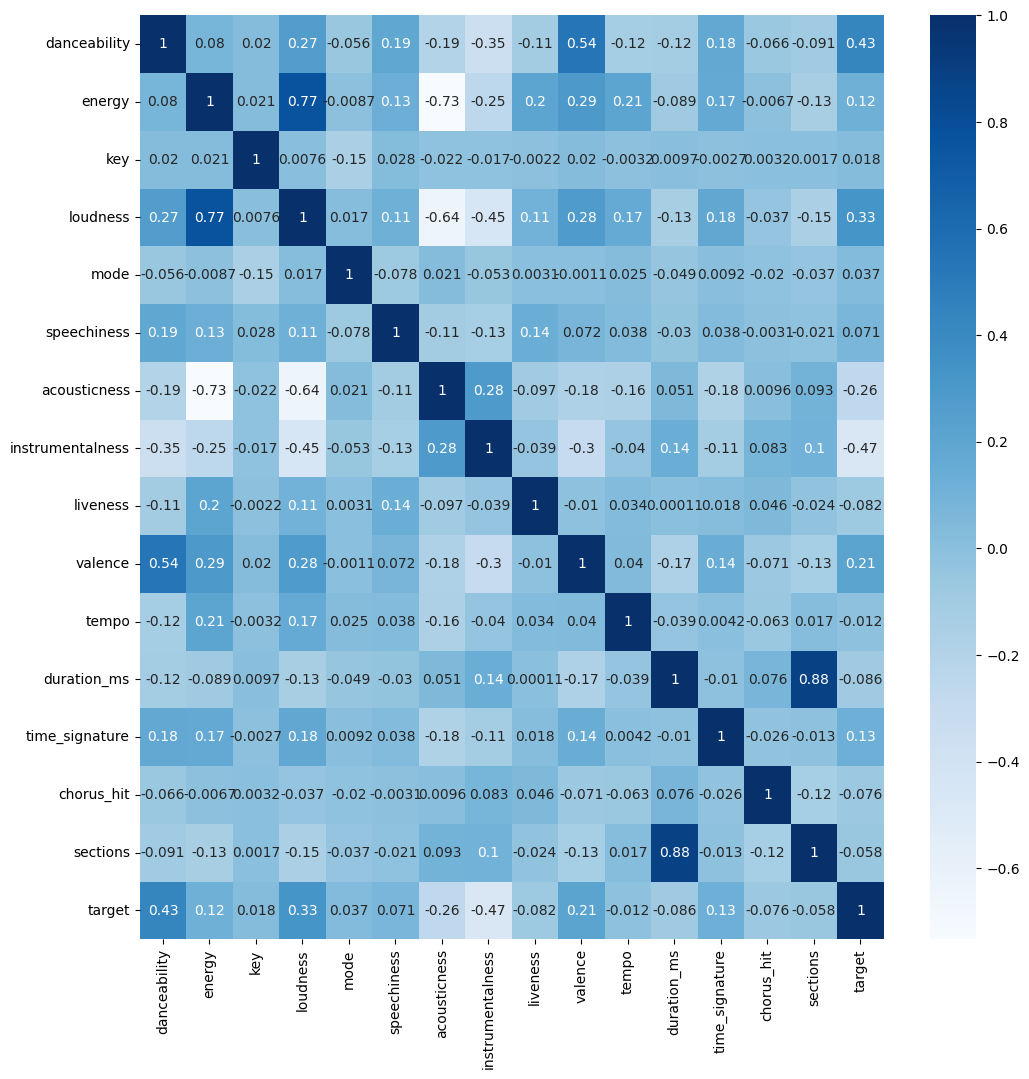

In [22]:
#Gráfico Heatmap das correlações
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap='Blues', annot=True);

#3. Separação dos dados

##3.1. Separação

In [23]:
df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [24]:
#Separação de "features" e "target"
features = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'time_signature',
    'chorus_hit',
    'sections'
]

target = ["target"]

In [25]:
#Notação f(X)=y (variáveis independentes e dependente)
X = df[features]
y = df[target]

In [26]:
print(X.shape, y.shape)

(17362, 15) (17362, 1)


In [27]:
#Separação de amostras de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#Verificando a distribuição dos valores para treino e teste
print(
    f" Features X_train: {X_train.shape}\n",
    f"Features X_test: {X_test.shape}\n",
    f"Features y_train: {y_train.shape}\n",
    f"Features y_test: {y_test.shape}\n",
)

 Features X_train: (12153, 15)
 Features X_test: (5209, 15)
 Features y_train: (12153, 1)
 Features y_test: (5209, 1)



In [29]:
#Separação de amostra de teste e validação
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [30]:
#Verificando a distribuição de teste e validação
print(
    f" X_test: {X_test.shape}\n",
    f"X_val: {X_val.shape}\n",
    f"y_test: {y_test.shape}\n",
    f"y_val: {y_val.shape}\n"
)

 X_test: (2605, 15)
 X_val: (2604, 15)
 y_test: (2605, 1)
 y_val: (2604, 1)



##3.2. Validação Cruzada (k-fold)

**Overfitting:**

Resultado bom no treino e ruim no teste.

**Underfitting:**

Houve pouco aprendizado no treino.



In [31]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#Separaçao dos dados para validação
for train_index, test_index in kfold.split(X_train): #Para cada fold
  X_train_fold = X_train.iloc[train_index] #Armazena o fold de treino X
  y_train_fold = y_train.iloc[train_index] #Armazena o fold de treino y

  X_test_fold = X_train.iloc[test_index] #Armazena ao fold de teste X
  y_test_fold = y_train.iloc[test_index] #Armazena o fold de teste y

In [34]:
#Treinar o modelo com conjunto de treino
#Aplicar o modelo no conjunto de teste
#Medir o resultado fold

#4. Modelos de ML

##4.0. Pre process

In [35]:
from sklearn.preprocessing import MinMaxScaler #Normalização dos dados MinMax

In [36]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) #Aplicação no conjunto de treino
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.347264,0.454259,0.000000,0.785451,0.0,0.015203,0.758032,0.624248,0.256148,0.289157,0.214131,0.025285,0.75,0.149573,0.012658
1,0.188927,0.931908,0.818182,0.895841,1.0,0.069165,0.000011,0.000002,0.106557,0.152610,0.535666,0.065448,0.75,0.225498,0.056962
2,0.599311,0.543380,0.454545,0.851011,1.0,0.376874,0.007791,0.000033,0.379098,0.486948,0.778995,0.057407,0.75,0.176967,0.056962
3,0.755493,0.825764,0.727273,0.912247,1.0,0.211991,0.092671,0.000571,0.232582,0.430723,0.310852,0.045089,0.75,0.285022,0.050633
4,0.800732,0.543380,0.454545,0.807389,1.0,0.073876,0.566265,0.000000,0.105533,0.536145,0.530036,0.072918,0.75,0.331427,0.056962


In [37]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [38]:
y_train = np.ravel(y_train)

##4.1. Regressão Logística

Classificação binária

In [39]:
from sklearn.linear_model import LogisticRegression #Módulo de regressão logística

In [40]:
model = LogisticRegression(random_state=42) #Cria o modelo
model

LogisticRegression(random_state=42)

In [41]:
model.fit(X_train, y_train) #Treina com as variáveis de treino

LogisticRegression(random_state=42)

In [42]:
y_pred = model.predict(X_test) #Faz uma previsão usando
y_pred = pd.Series(y_pred)

In [43]:
y_pred.value_counts(normalize=True)

,proportion
1,0.584373
0,0.415627


In [44]:
accuracy_score(y_test, y_pred)

0.7928585141101939

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2606
           1       0.75      0.88      0.81      2603

    accuracy                           0.79      5209
   macro avg       0.80      0.79      0.79      5209
weighted avg       0.80      0.79      0.79      5209



##4.2. k-NN (k Nearest Neighbors)

Modelo de classificação por aproximação de características

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier()

In [48]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = model.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76      2606
           1       0.75      0.86      0.80      2603

    accuracy                           0.78      5209
   macro avg       0.79      0.78      0.78      5209
weighted avg       0.79      0.78      0.78      5209



In [51]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2606
           1       0.74      0.82      0.78      2603

    accuracy                           0.77      5209
   macro avg       0.77      0.77      0.77      5209
weighted avg       0.77      0.77      0.77      5209



In [52]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2606
           1       0.76      0.86      0.81      2603

    accuracy                           0.80      5209
   macro avg       0.80      0.80      0.80      5209
weighted avg       0.80      0.80      0.80      5209



##4.3. Árvore de decisão

De forma iterada, compara variáveis, identificando a relevância de cada, gerando uma classificação (separação) na árvore de decisão.

Não necessita de normalização

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2606
           1       0.75      0.76      0.75      2603

    accuracy                           0.75      5209
   macro avg       0.75      0.75      0.75      5209
weighted avg       0.75      0.75      0.75      5209



In [55]:
model = DecisionTreeClassifier(random_state=42, criterion="entropy")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2606
           1       0.76      0.76      0.76      2603

    accuracy                           0.76      5209
   macro avg       0.76      0.76      0.76      5209
weighted avg       0.76      0.76      0.76      5209



In [56]:
y_pred_train = model.predict(X_train) #Verificando avaliação no conjunto de treino
print(classification_report(y_train, y_pred_train)) #Relatório do conjunto de treino (Overfitting)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6036
           1       1.00      1.00      1.00      6117

    accuracy                           1.00     12153
   macro avg       1.00      1.00      1.00     12153
weighted avg       1.00      1.00      1.00     12153



In [57]:
model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2606
           1       0.78      0.86      0.82      2603

    accuracy                           0.81      5209
   macro avg       0.81      0.81      0.81      5209
weighted avg       0.81      0.81      0.81      5209



In [58]:
y_pred_train = model.predict(X_train) #Verificando avaliação no conjunto de treino
print(classification_report(y_train, y_pred_train)) #Relatório do conjunto de treino (Overfitting)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      6036
           1       0.80      0.88      0.84      6117

    accuracy                           0.83     12153
   macro avg       0.83      0.83      0.83     12153
weighted avg       0.83      0.83      0.83     12153



## 4.4. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

###4.4.1. Teste em outra base de dados

In [60]:
from sklearn.datasets import load_iris

In [61]:
iris = load_iris()

In [62]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [63]:
model = RandomForestClassifier()
model.fit(X_train_iris, y_train_iris)

y_pred_iris = model.predict(X_test_iris)
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [64]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_iris, y_train_iris)

y_pred_iris = model.predict(X_test_iris)
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



###4.4.2. Base principal

In [65]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



In [66]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, np.ravel(y_train))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.84      0.83      0.83      5209
weighted avg       0.84      0.83      0.83      5209



In [67]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, np.ravel(y_train))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.84      5209
   macro avg       0.84      0.84      0.84      5209
weighted avg       0.84      0.84      0.84      5209



##4.5. Gradient Boost

Algoritmo de treinamento sequencial (Boosting)

Cada árvore é corrigida no treinamento seguinte, através dos resíduos (erros anteriores).

As árvores iniciais são simples e pequenas.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2606
           1       0.79      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



In [70]:
model = GradientBoostingClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2606
           1       0.80      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.84      0.83      0.83      5209
weighted avg       0.84      0.83      0.83      5209



In [71]:
model = GradientBoostingClassifier(learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      2606
           1       0.79      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



##4.6. Redes Neurais

###4.6.1. Aplicando a rede neural

In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
#Criando a rede
model = MLPClassifier(random_state=42) #Cria o modelo
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      2606
           1       0.79      0.90      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [74]:
model = MLPClassifier(hidden_layer_sizes=(100, 100),random_state=42) #Cria o modelo
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2606
           1       0.80      0.88      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
model = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', random_state=42) #Cria o modelo
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2606
           1       0.77      0.91      0.83      2603

    accuracy                           0.82      5209
   macro avg       0.83      0.82      0.82      5209
weighted avg       0.83      0.82      0.82      5209



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


###4.6.2. Avaliação AUC ROC

In [76]:
from sklearn.metrics import roc_curve, auc

In [77]:
y_proba = model.predict_proba(X_test)

In [78]:
#acessa todas as linhas e retorna apenas os valores da coluna de índice 1
y_proba[:, 1]

array([0.02201053, 0.29246471, 0.05553485, ..., 0.10701688, 0.50735984,
       0.00543395])

In [79]:
#
fpr, tpr, threshoulds = roc_curve(y_test, y_proba[:, 1])

In [80]:
#
auc_roc = auc(fpr, tpr)
auc_roc

np.float64(0.884097662859638)

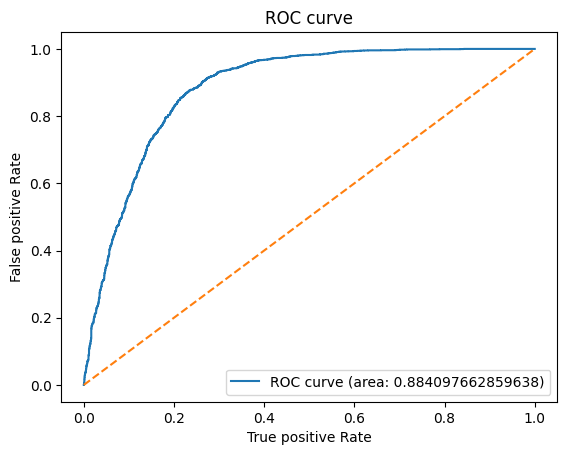

In [81]:
#plot da curva 'auc_roc'
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area: {auc_roc})")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("True positive Rate")
plt.ylabel("False positive Rate")
plt.title("ROC curve")
plt.legend()

plt.show()

###4.6.3. Observando iterações da Rede Neural

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [83]:
#modelo com 1 iteração
model = MLPClassifier(max_iter=1, warm_start=True, random_state=42)

max_iterations = 1000
accuracy_val_results = []
accuracy_train_results = []

for iter in range(max_iterations):
  model.fit(X_train, y_train)

  y_pred_val = model.predict(X_val)
  y_pred_train = model.predict(X_train)

  accuracy_val = accuracy_score(y_val, y_pred_val)
  accuracy_val_results.append(accuracy_val)

  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_train_results.append(accuracy_train)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

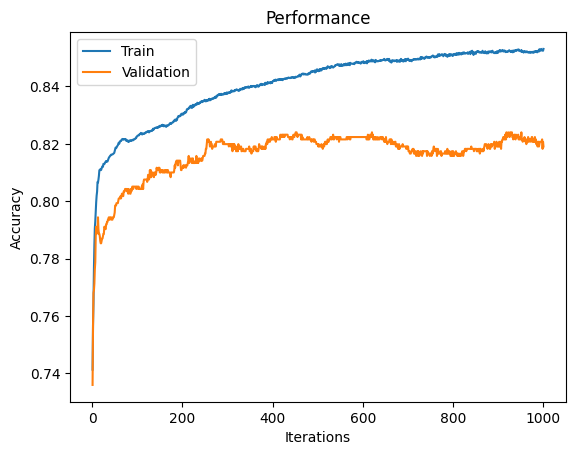

In [84]:
plt.figure()

plt.plot(range(1, max_iterations+1), accuracy_train_results, label='Train')
plt.plot(range(1, max_iterations+1), accuracy_val_results, label='Validation')

plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.title("Performance")

plt.legend()

plt.show()

#5. Comparação de modelos

##5.1. Validação cruzada

In [85]:
#biblioteca de validação cruzada
from sklearn.model_selection import cross_val_score

In [86]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

In [87]:
results_names =[]
results_mean =[]
results_std =[]

for model_name, model in models.items():
  print(model_name)
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

  results_names.append(model_name)
  results_mean.append(cv_scores.mean())
  results_std.append(cv_scores.std())

Logistic Regression
k-NN
Decision Tree
Random Forest
Gradient Boosting
Neural Network


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [88]:
df_results = pd.DataFrame({
    "Modelo": results_names,
    "Acurácia média": results_mean,
    "Acurácia std": results_std
})

df_results

,Modelo,Acurácia média,Acurácia std
0,Logistic Regression,0.794734,0.007753
1,k-NN,0.782482,0.005086
2,Decision Tree,0.757703,0.010825
3,Random Forest,0.834874,0.008698
4,Gradient Boosting,0.833593,0.010082
5,Neural Network,0.820793,0.008514


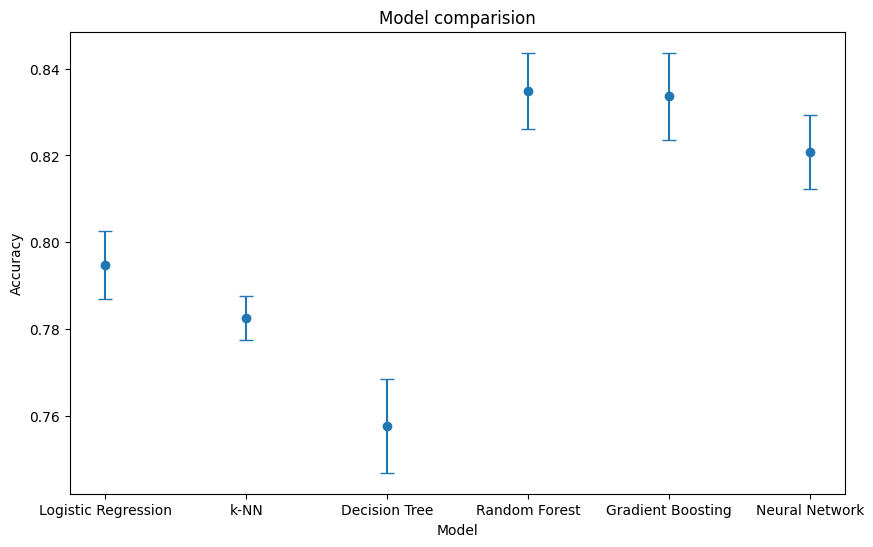

In [89]:
plt.figure(figsize=(10,6))
plt.errorbar(df_results["Modelo"], df_results["Acurácia média"], yerr=df_results["Acurácia std"], fmt="o", capsize=5)

plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Model comparision")
plt.show()

#6. Hiper-parâmetros

##6.1. Tuning de Hiper-parâmetros

(Por força bruta)

Modelo utilizado: k-NN

In [116]:
#lista de possíveis valores para k
k_list = [1, 3, 5, 6, 7, 15, 21, 25]

In [121]:
#Esta é a base do GridSearch
#Para cada lista temos um FOR de iteração

results = [] #receber os resultados

for k in k_list:
  scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy')
  results.append({
      "k": k,
      "accuracy": scores.mean()
  })

df_results_knn = pd.DataFrame(results)

In [118]:
df_results_knn

,k,accuracy
0,1,0.738960
1,3,0.769133
2,5,0.782482
3,6,0.783854
4,7,0.788607
5,15,0.796471
6,21,0.797293
7,25,0.795922


<Axes: xlabel='k', ylabel='accuracy'>

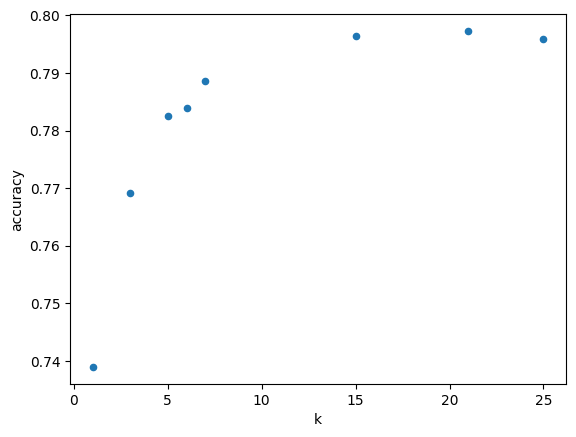

In [120]:
df_results_knn.plot(x="k", y="accuracy", kind="scatter")

##6.2. GridSearch

In [103]:
from sklearn.model_selection import GridSearchCV

In [123]:
model = RandomForestClassifier()

parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [125]:
#Melhores parâmetros do Grid
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [128]:
#Informações sobre o grid
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.253922,0.117072,0.015152,0.011342,5,2,10,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.814442,0.800731,0.817101,0.804755,0.828989,0.813204,0.009928,26
1,1.200389,0.204064,0.033657,0.016289,5,2,50,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.822669,0.810329,0.828989,0.817558,0.828989,0.821707,0.007123,18
2,1.464815,0.503263,0.016972,0.000320,5,2,100,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.820841,0.805302,0.822131,0.817558,0.830361,0.819239,0.008145,21
3,0.115255,0.010064,0.005765,0.002858,5,5,10,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.815356,0.796618,0.817558,0.805213,0.828075,0.812564,0.010786,27
4,0.540383,0.013921,0.010519,0.000919,5,5,50,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.817185,0.803931,0.823960,0.813900,0.828989,0.817593,0.008613,23


<Axes: >

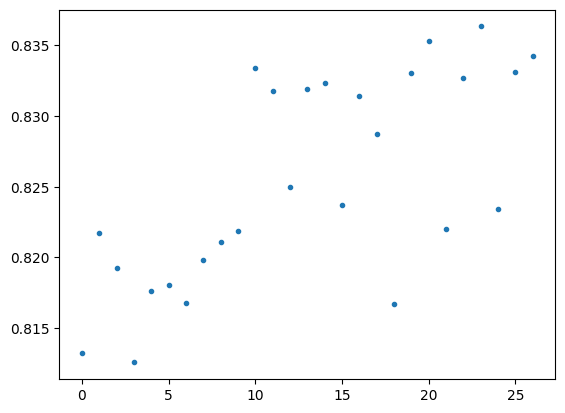

In [130]:
#Gráfico com os scores médios de dos testes
df_results['mean_test_score'].plot(style=".")

##6.3. RandomSearch

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [131]:
model = RandomForestClassifier()

parameters = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20)
}

random_search = RandomizedSearchCV(model, parameters, cv=5, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d27497a7f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d27497a5390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d27497a6690>},
                   random_state=42, scoring='accuracy')

In [115]:
print(random_search.best_params_)

{'max_depth': 25, 'min_samples_split': 8, 'n_estimators': 92}


In [133]:
df_results = pd.DataFrame(random_search.cv_results_)
df_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.041785,0.024246,0.027571,0.001206,43,16,81,"{'max_depth': 43, 'min_samples_split': 16, 'n_...",0.839122,0.820384,0.839963,0.830361,0.839963,0.833959,0.007694,6
1,2.719649,0.469033,0.034760,0.004065,25,8,92,"{'max_depth': 25, 'min_samples_split': 8, 'n_e...",0.840951,0.822212,0.840878,0.826703,0.844079,0.834965,0.008772,2
2,2.121799,0.025661,0.032106,0.006737,27,12,84,"{'max_depth': 27, 'min_samples_split': 12, 'n_...",0.835923,0.820841,0.838592,0.825789,0.841792,0.832587,0.007951,12
3,0.891436,0.070327,0.018168,0.006953,28,5,33,"{'max_depth': 28, 'min_samples_split': 5, 'n_e...",0.828154,0.814899,0.834019,0.823503,0.839049,0.827925,0.008368,16
4,1.708689,0.331146,0.019853,0.001045,7,3,97,"{'max_depth': 7, 'min_samples_split': 3, 'n_es...",0.831810,0.812614,0.829447,0.823045,0.835391,0.826461,0.008008,18


<Axes: >

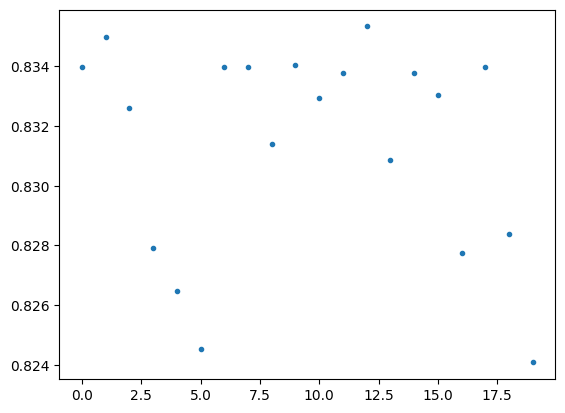

In [135]:
df_results['mean_test_score'].plot(style=".")

#Apêndice

#I. Métricas de avaliação

##Variáveis e testes

In [90]:
y_true = []

for i in range(100):
  y_true.append(randint(0,1))

y_pred2 = []

for i in range(100):
  y_pred2.append(randint(0,1))

In [91]:
T = 0
for i in range(len(y_true)):
  if y_pred2[i] == y_true[i]:
    T += 1

print(T)

51


In [92]:
TP = 0
posicoes = []
for i in range(len(y_true)):
  if y_pred2[i] == y_true[i] == 1:
    posicoes.append(i)
    TP += 1
print(f" {TP},\n {posicoes}")

 28,
 [6, 7, 11, 12, 14, 15, 17, 19, 23, 24, 35, 36, 43, 50, 59, 73, 75, 81, 84, 88, 89, 90, 92, 93, 94, 95, 98, 99]


In [93]:
TN = 0
posicoes = []
for i in range(len(y_true)):
  if y_pred2[i] == y_true[i] == 0:
    posicoes.append(i)
    TN += 1
print(f" {TN},\n {posicoes}")

 23,
 [3, 10, 20, 31, 37, 42, 49, 51, 53, 56, 58, 60, 61, 63, 64, 65, 70, 72, 80, 82, 83, 86, 97]


In [94]:
FP = 0
posicoes = []
for i in range(len(y_true)):
  if y_pred2[i] == 1 and y_true[i] == 0 :
    posicoes.append(i)
    FP += 1
print(f" {FP},\n {posicoes}")

 20,
 [0, 1, 2, 4, 5, 8, 13, 16, 18, 21, 29, 30, 40, 52, 54, 57, 69, 74, 85, 96]


In [95]:
FN = 0
posicoes = []
for i in range(len(y_true)):
  if y_pred2[i] == 0 and y_true[i] == 1 :
    posicoes.append(i)
    FN += 1
print(f" {FN},\n {posicoes}")

 29,
 [9, 22, 25, 26, 27, 28, 32, 33, 34, 38, 39, 41, 44, 45, 46, 47, 48, 55, 62, 66, 67, 68, 71, 76, 77, 78, 79, 87, 91]


In [96]:
acertos = TP + TN
total = T + FP + FN

In [97]:
cm = confusion_matrix(y_true, y_pred2)
cm

array([[23, 20],
       [29, 28]])

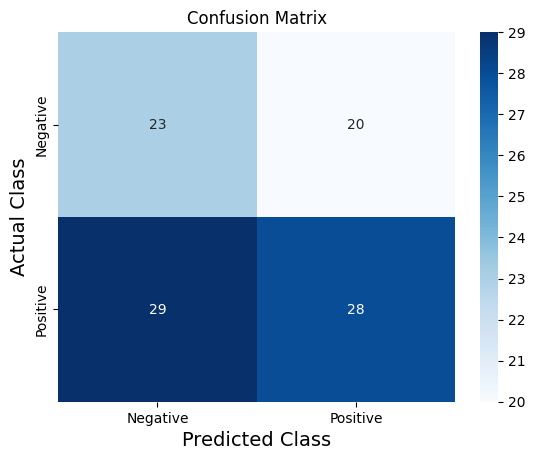

In [98]:
ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

ax.set_xlabel("Predicted Class", fontsize=14)
ax.set_ylabel("Actual Class", fontsize=14)
ax.set_title("Confusion Matrix");

##Acurácia

(TP+TN) / (Total)

In [99]:
acuracia = accuracy_score(y_true, y_pred2)
print(f"Dos {len(y_true)} itens da lista, houve {round(acuracia*100,1)}% de acertos.")

acuracia = acertos / total
print(f"Dos {len(y_true)} itens da lista, houve {round(acuracia*100,1)}% de acertos.")

Dos 100 itens da lista, houve 51.0% de acertos.
Dos 100 itens da lista, houve 51.0% de acertos.


##Precisão

(TP) / (TP+FP)

In [100]:
precisao = precision_score(y_true, y_pred2)
print(f"Dos {len(y_true)} itens da lista, houve {round(precisao*100,1)}% de acertos na previsão de positivos.")

precisao = TP / (TP + FP)
print(f"Dos {len(y_true)} itens da lista, houve {round(precisao*100,1)}% de acertos na previsão de positivos.")

Dos 100 itens da lista, houve 58.3% de acertos na previsão de positivos.
Dos 100 itens da lista, houve 58.3% de acertos na previsão de positivos.


##Recall
(TP) / (TP+FN)

In [101]:
recall = recall_score(y_true, y_pred2)
print(f"Dos {len(y_true)} itens da lista, houve {round(recall*100,1)}% de acertos dos verdadeiros positivos.")

recall = TP / (TP + FN)
print(f"Dos {len(y_true)} itens da lista, houve {round(recall*100,1)}% de acertos dos verdadeiros positivos.")

Dos 100 itens da lista, houve 49.1% de acertos dos verdadeiros positivos.
Dos 100 itens da lista, houve 49.1% de acertos dos verdadeiros positivos.


##F1 Score
Média hamônica dentre precisão e recall

F1 = 2 * (precisão * recall) / (precisão + recall)

In [102]:
f1 = f1_score(y_true, y_pred2)
print(f"Dos {len(y_true)} itens da lista, houve {round(f1*100,1)}% de acertos dos verdadeiros positivos.")

f1 = 2*((precisao * recall)/(precisao + recall))
print(f"Dos {len(y_true)} itens da lista, houve {round(f1*100,1)}% de acertos dos verdadeiros positivos.")

Dos 100 itens da lista, houve 53.3% de acertos dos verdadeiros positivos.
Dos 100 itens da lista, houve 53.3% de acertos dos verdadeiros positivos.


##AUC ROC

Comparações gerais do modelo

Modelos com classes balanceadas

##AUC PR
Modelos com dados desbalanceados

#II.